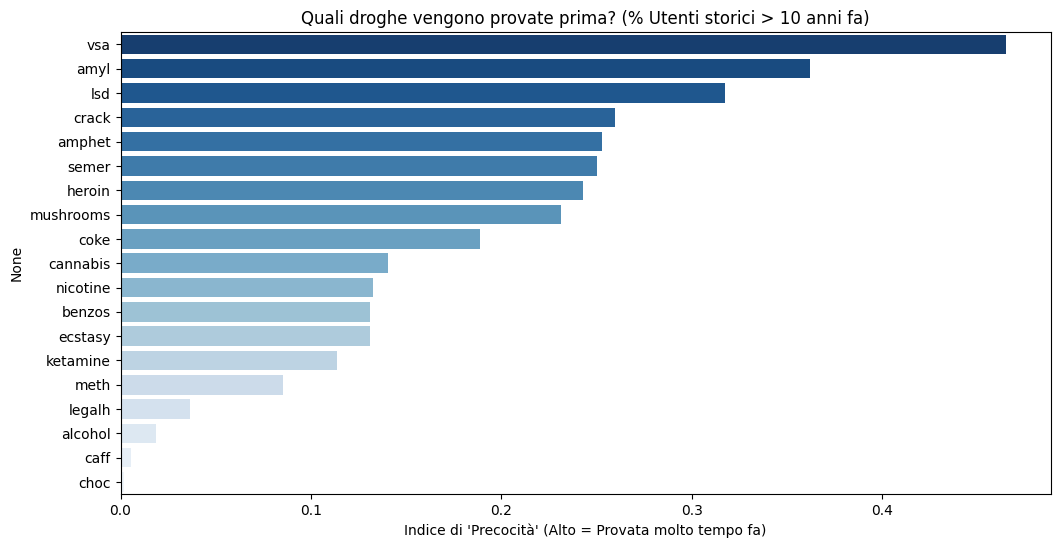

In [1]:
# SETUP DATI
!pip install ucimlrepo -q
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc

drug_consumption = fetch_ucirepo(id=373)
X = drug_consumption.data.features

targets_numeric = drug_consumption.data.targets.copy()
targets_binary = targets_numeric.replace(
    {'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
)

# 5. EURISTICA "ORDINE DI UTILIZZO" (Gateway Theory)
# Stimiamo l'ordine basandoci su chi ha iniziato "più di 10 anni fa"

# Calcoliamo per ogni droga la % di utenti che l'hanno usata "Over a Decade Ago" (CL1)
# rispetto al totale degli utenti (CL1-CL6)
gateway_score = {}

for drug in targets_numeric.columns:
    if drug == 'Semer': continue
    users = targets_numeric[drug].isin(['CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'])
    long_term_users = targets_numeric[drug] == 'CL1' # Usata > 10 anni fa

    if users.sum() > 0:
        # Score = % di utenti storici sul totale utenti
        score = long_term_users.sum() / users.sum()
        gateway_score[drug] = score

gateway_df = pd.Series(gateway_score).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gateway_df.values, y=gateway_df.index, palette='Blues_r')
plt.title("Quali droghe vengono provate prima? (% Utenti storici > 10 anni fa)")
plt.xlabel("Indice di 'Precocità' (Alto = Provata molto tempo fa)")
plt.show()